In [2]:
import pandas as pd
data=pd.read_csv("books_task.csv")


In [3]:
data.head()

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
0,0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],Smithsonian Institution,1996,['Comics & Graphic Novels'],784.303924
1,1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],825.465535
2,2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],OUP USA,2000,['Religion'],841.705321
3,3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],666.426542
4,5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],806.216143


In [4]:
def remove_outliers(df, column, threshold=3):
    
    # Calculate the mean and standard deviation of the column
    mean = df[column].mean()
    std_dev = df[column].std()

    # Calculate the lower and upper bounds for outliers
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev

    # Filter out rows where the column value is outside the bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

In [6]:
data = remove_outliers(data, 'Impact')


In [65]:
print(data.shape)
print(data['authors'].nunique())
print(data['publisher'].nunique())
print(data['categories'].nunique())



(136350, 9)
96657
12776
100


In [45]:
# (138724-136350)/138724*100

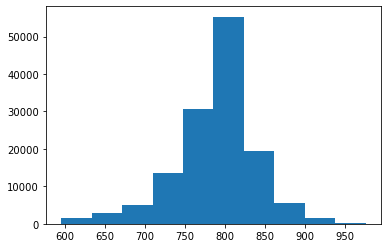

In [8]:
import matplotlib.pyplot as plt
plt.hist(data['Impact']);

In [9]:
data['Impact'].describe()

count    136350.000000
mean        791.486611
std          51.774904
min         595.855551
25%         767.034878
50%         805.568540
75%         819.108336
max         976.417235
Name: Impact, dtype: float64

In [93]:
data[data.Impact<100]

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
22626,31363,"Crossroads of Twilight (The Wheel of Time, Boo...",The Wheel of Time ® is a PBS Great American Re...,['Robert Jordan'],Tor Fantasy,2010-07-20,['Fiction'],0.000000
89337,134635,Day of Reckoning: The Massacre at Columbine Hi...,"Who was the evilest of the evil, the baddest o...",['Martin Gilman Wolcott'],Citadel Press,2004,['History'],5.333957
136418,207153,Predator (Kay Scarpetta Mysteries),Kay Scarpetta and her colleague Pete Marino in...,['Patricia Daniels Cornwell'],Berkley,2012,['Fiction'],30.556660


In [10]:
51.774904/791.486611*100

6.541475658645096

Null Values

In [11]:
data['description'].isna().value_counts(normalize=True).mul(100)

False    90.712138
True      9.287862
Name: description, dtype: float64

In [12]:
data['Title'].isna().value_counts(normalize=True).mul(100)

False    100.0
Name: Title, dtype: float64

In [13]:
data['authors'].isna().value_counts(normalize=True).mul(100)

False    98.025669
True      1.974331
Name: authors, dtype: float64

In [14]:
data['publisher'].isna().value_counts(normalize=True).mul(100)

False    100.0
Name: publisher, dtype: float64

In [15]:
data['publishedDate'].isna().value_counts(normalize=True).mul(100)

False    99.748442
True      0.251558
Name: publishedDate, dtype: float64

In [16]:
data['categories'].isna().value_counts(normalize=True).mul(100)

False    100.0
Name: categories, dtype: float64

In [17]:
# data.groupby('categories',as_index=False)['Impact'].mean().plot()

Authors

In [18]:
import numpy as np

In [19]:
authors_count=data.groupby('authors',as_index=False)['Title'].nunique()

In [20]:
authors_count['Title'].value_counts(normalize=True).mul(100)

1      82.878633
2      10.562091
3       3.071686
4       1.269437
5       0.670412
6       0.417973
7       0.253474
8       0.199675
9       0.131392
10      0.095182
11      0.074490
12      0.060006
13      0.055868
14      0.039314
15      0.036211
16      0.022761
18      0.018623
17      0.015519
20      0.012415
19      0.009311
28      0.009311
24      0.008277
22      0.007242
25      0.006208
26      0.006208
21      0.006208
29      0.006208
32      0.005173
23      0.005173
35      0.004138
27      0.004138
31      0.003104
39      0.003104
37      0.002069
30      0.002069
33      0.002069
36      0.002069
34      0.002069
61      0.002069
54      0.001035
49      0.001035
102     0.001035
55      0.001035
109     0.001035
98      0.001035
51      0.001035
233     0.001035
48      0.001035
40      0.001035
162     0.001035
59      0.001035
50      0.001035
41      0.001035
47      0.001035
58      0.001035
42      0.001035
45      0.001035
Name: Title, dtype: float64

In [21]:
authors_impact=data.groupby('authors',as_index=False)['Impact'].mean()

In [22]:
authors_df=authors_count.merge(authors_impact)

In [23]:
authors_df.corr()

,Title,Impact
Title,1.000000,-0.003046
Impact,-0.003046,1.000000


In [24]:
authors_df[authors_df.Title==1]['Impact'].describe()

count    80108.000000
mean       791.818924
std         49.234525
min        596.604337
25%        770.726964
50%        805.568540
75%        819.108336
max        974.640408
Name: Impact, dtype: float64

In [25]:
authors_df[authors_df.Title==2]['Impact'].describe()

count    10209.000000
mean       790.890991
std         42.364838
min        599.911435
25%        768.189902
50%        796.018296
75%        815.697059
max        970.938991
Name: Impact, dtype: float64

In [26]:
authors_df[authors_df.Title>2]['Impact'].describe()

count    6340.000000
mean      790.780824
std        36.409205
min       601.777060
25%       769.491259
50%       793.224998
75%       813.278683
max       956.340035
Name: Impact, dtype: float64

In [27]:
np.percentile(authors_df['Title'],99.99)

54.334399999992456

In [28]:
authors_df[authors_df.Title>=55]['Impact'].describe()

count     10.000000
mean     791.981442
std       12.475913
min      774.745684
25%      783.021328
50%      789.548884
75%      799.350619
max      814.090917
Name: Impact, dtype: float64

In [56]:
authors_df.sort_values('Title',ascending=False)

,authors,Title,Impact
80772,['Rose Arny'],233,785.176493
55922,['Library of Congress. Copyright Office'],162,793.921275
390,"[""Louis L'Amour""]",109,814.090917
95525,['William Shakespeare'],102,774.745684
1605,['Agatha Christie'],98,782.847274
...,...,...,...
35206,['Heather Lloyd'],1,816.497238
35205,['Heather Levigne'],1,784.303924
35204,['Heather Lende'],1,805.568540
35202,"['Heather Kreger', 'Ward Harold', 'Leigh Willi...",1,834.414650


Publisher

In [29]:
publisher_count=data.groupby('publisher',as_index=False)['Title'].nunique()
publisher_count['Title'].value_counts(normalize=True).mul(100)

1       55.087664
2       12.867877
3        6.230432
4        4.046650
5        2.708203
          ...    
450      0.007827
313      0.007827
387      0.007827
525      0.007827
1041     0.007827
Name: Title, Length: 235, dtype: float64

In [30]:
publisher_impact=data.groupby('publisher',as_index=False)['Impact'].mean()

In [31]:
publisher_df=publisher_count.merge(publisher_impact)

In [32]:
publisher_df.corr()

,Title,Impact
Title,1.000000,-0.009754
Impact,-0.009754,1.000000


In [33]:
print(publisher_df[publisher_df.Title==1]['Impact'].mean())
print(publisher_df[publisher_df.Title==2]['Impact'].mean())
print(publisher_df[publisher_df.Title==3]['Impact'].mean())
print(publisher_df[publisher_df.Title==4]['Impact'].mean())
print(publisher_df[publisher_df.Title==5]['Impact'].mean())
print(publisher_df[publisher_df.Title>5]['Impact'].mean())

795.6602366276907
794.6862545732661
793.6092284043057
795.3620147388121
793.8976384925495
792.0699851290115


In [34]:
print(publisher_df[publisher_df.Title==1]['Impact'].min())
print(publisher_df[publisher_df.Title==2]['Impact'].min())
print(publisher_df[publisher_df.Title==3]['Impact'].min())
print(publisher_df[publisher_df.Title==4]['Impact'].min())
print(publisher_df[publisher_df.Title==5]['Impact'].min())
print(publisher_df[publisher_df.Title>5]['Impact'].min())

596.8882989192275
619.3682781140045
609.7181055999849
687.5533224031492
704.1145473540845
618.7072155020346


In [35]:
print(publisher_df[publisher_df.Title==1]['Impact'].max())
print(publisher_df[publisher_df.Title==2]['Impact'].max())
print(publisher_df[publisher_df.Title==3]['Impact'].max())
print(publisher_df[publisher_df.Title==4]['Impact'].max())
print(publisher_df[publisher_df.Title==5]['Impact'].max())
print(publisher_df[publisher_df.Title>5]['Impact'].max())

973.7426270134318
931.7974055258048
883.3409628451991
915.3408544268334
873.479780485953
898.804634630236


In [60]:
print(np.percentile(publisher_df['Title'],25))
print(np.percentile(publisher_df['Title'],50))
print(np.percentile(publisher_df['Title'],75))
print(np.percentile(publisher_df['Title'],95))
print(np.percentile(publisher_df['Title'],99))
print(np.percentile(publisher_df['Title'],99.5))
print(np.percentile(publisher_df['Title'],99.9))

1.0
1.0
4.0
29.0
150.0
267.5
1120.8250000001244


In [36]:
publisher_df.sort_values(by='Title',ascending=False).head(10)

,publisher,Title,Impact
11050,Tan Books & Pub,3635,805.429809
10397,Simon and Schuster,3476,794.041556
10487,Smithsonian Institution,3216,788.289553
8767,Penguin,2667,788.420738
12412,Wm. B. Eerdmans Publishing,2563,814.085374
9821,Routledge,2355,785.379330
5959,John Wiley & Sons,1924,782.950876
4898,Harper Collins,1868,783.320207
2040,Cambridge University Press,1470,789.263285
69,A&C Black,1348,824.529016


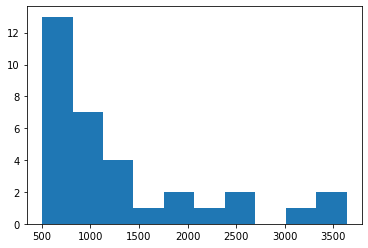

In [53]:
plt.hist(publisher_df[publisher_df.Title>500]['Title']);

Category

In [37]:
category_count=data.groupby('categories',as_index=False)['Title'].nunique()
category_count['Title'].value_counts(normalize=True).mul(100)

107     2.0
74      2.0
97      2.0
101     2.0
78      2.0
       ... 
320     1.0
1335    1.0
158     1.0
2429    1.0
79      1.0
Name: Title, Length: 95, dtype: float64

In [38]:
category_impact=data.groupby('categories',as_index=False)['Impact'].mean()

In [39]:
category_impact['Impact'].describe()

count    100.000000
mean     792.769474
std        9.241113
min      761.161597
25%      787.228954
50%      792.872946
75%      799.007572
max      812.227203
Name: Impact, dtype: float64

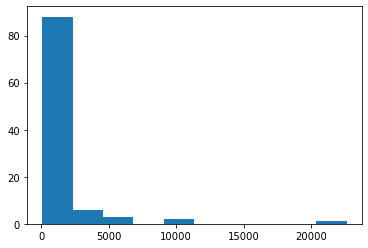

In [40]:
plt.hist(category_count['Title']);

In [41]:
category_count.sort_values(by='Title',ascending=False)

,categories,Title
49,['Fiction'],22630
84,['Religion'],9356
58,['History'],9223
63,['Juvenile Fiction'],6572
17,['Biography & Autobiography'],6193
...,...,...
99,['Young Adult Nonfiction'],79
28,['Christianity'],78
82,['Railroads'],78
20,['Brothers and sisters'],74


In [47]:
category_count['Title'].describe()

count      100.000000
mean      1363.500000
std       2758.158347
min         74.000000
25%        113.000000
50%        439.000000
75%       1678.750000
max      22630.000000
Name: Title, dtype: float64

In [48]:
# Split Authors in 1,2,2+
# Split Publishers in  5,30,150,250,1000
# Categories Quantile Bins


In [61]:
#####